In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

In [3]:
#any transformation can be done with a combination of the above 3

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z


def cylindrical_to_spherical(rho, psi, z):
    r = np.sqrt(rho**2 + z**2)
    theta = np.arctan2(rho, z) if r != 0 else 0
    phi = psi
    return r, theta, phi

def cartesian_to_cylindrical(x, y, z):
    rho = np.sqrt(x**2 + y**2)
    psi = np.arctan2(y, x)
    return rho, psi, z



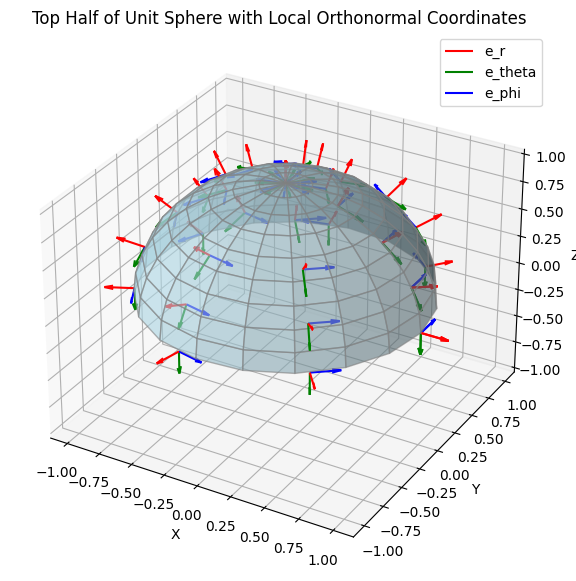

In [4]:
def local_orthonormal_coords(theta, phi):
    """
    Compute the local orthonormal coordinate system on the unit sphere at (theta, phi).
    """
    # Radial unit vector
    e_r = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    
    # Polar unit vector
    e_theta = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    
    # Azimuthal unit vector
    e_phi = np.array([
        -np.sin(phi),
        np.cos(phi),
        0
    ])
    
    return e_r, e_theta, e_phi


# Generate the top half of a unit sphere
theta_vals = np.linspace(0, np.pi / 2, 10)  # Polar angles
phi_vals = np.linspace(0, 2 * np.pi, 20)   # Azimuthal angles
theta, phi = np.meshgrid(theta_vals, phi_vals)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='lightblue', alpha=0.6, edgecolor='gray')

# Select a few points on the sphere to display local coordinate systems
sample_thetas = np.linspace(0, np.pi / 2, 5)
sample_phis = np.linspace(0, 2 * np.pi, 8)

first_point = True  # To label the vectors only for the first point
for theta in sample_thetas:
    for phi in sample_phis:
        # Compute the point on the sphere
        r = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])
        
        # Get local orthonormal basis
        e_r, e_theta, e_phi = local_orthonormal_coords(theta, phi)
        
        # Plot the local basis vectors
        ax.quiver(*r, *e_r, color='red', length=0.2, normalize=True, label='e_r' if first_point else "")
        ax.quiver(*r, *e_theta, color='green', length=0.2, normalize=True, label='e_theta' if first_point else "")
        ax.quiver(*r, *e_phi, color='blue', length=0.2, normalize=True, label='e_phi' if first_point else "")
        first_point = False  # Disable further labeling

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(-1, 1)
ax.set_zlabel('Z')
ax.set_title('Top Half of Unit Sphere with Local Orthonormal Coordinates')
ax.legend(loc='upper right')
plt.show()

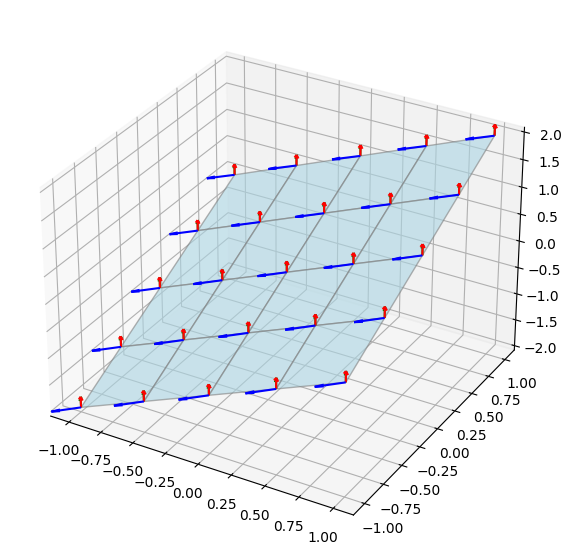

In [23]:
def generate_local_coords(f, x_vals, y_vals, dx=1e-4, dy=1e-4):
    Z = f(x_vals, y_vals)
    
    # Compute the gradients (∂f/∂x) and (∂f/∂y)
    fx = np.gradient(Z, axis=1, edge_order=2) / dx  # Gradient with respect to x
    fy = np.gradient(Z, axis=0, edge_order=2) / dy  # Gradient with respect to y
    
    # Tangent vectors in x and y directions
    e_x = np.stack([np.ones_like(fx), np.zeros_like(fx), fx], axis=0)     #like matches shape
    e_y = np.stack([np.zeros_like(fy), np.ones_like(fy), fy], axis=0)
    
    # Compute the normal vector (gradient of surface)
    e_z = np.array([-fx, -fy, np.ones_like(fx)])
    
    # Normalize the normal vector
    norm_e_z = np.linalg.norm(e_z, axis=0)
    e_z = e_z / norm_e_z
    
    # Normalize the tangent vectors (optional)
    e_x = e_x / np.linalg.norm(e_x, axis=0)
    e_y = e_y / np.linalg.norm(e_y, axis=0)
    
    return e_x, e_y, e_z


#testing the above function

def addfunc(x, y):
    return (x+y)

xvals = np.linspace(-1,1,5)
yvals = np.linspace(-1,1,5)

xmvals, ymvals = np.meshgrid(xvals, yvals)      #necessary for plot surface
zmvals = addfunc(xmvals, ymvals)
r = np.column_stack((xmvals, ymvals, zmvals))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmvals, ymvals, zmvals, color='lightblue', alpha=0.6, edgecolor='gray')

e_x, e_y, e_z = generate_local_coords(addfunc, xmvals, ymvals )

# Plot the local basis vectors
ax.quiver(xmvals, ymvals, zmvals, e_x[0], e_x[1], e_x[2], color='red', length=0.2, normalize=True)
ax.quiver(xmvals, ymvals, zmvals, e_y[0], e_y[1], e_y[2], color='green', length=0.2, normalize=True)
ax.quiver(xmvals, ymvals, zmvals, e_z[0], e_z[1], e_z[2], color='blue', length=0.2, normalize=True)

[       nan        nan 0.         1.         1.41421356]
